# Поиск точек роста эффективности привлечения пользователей приложения Procrastinate Pro+
___
<h3> Описание исследования. </h3> 
    
В данном исследовании мы поставим себя на место маркетингового аналитика развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев наш бизнес постоянно нёс убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Нам нужно разобраться в причинах этой ситуации. 

<h3> Цель исследования. </h3> 

**Сформировать рекомендации для отдела маркетинга для повышения эффективности привлечения пользователей.**
    
Суть исследования: Провести анализ данных по результатам которого отдел маркетинга сможет правильно спланировать рекламные кампании, сделать ставки на определённые каналы привлечения, устройства и географические характеристики пользователей.

<h3>  Задачи исследования.</h3> 

В нашем исследовании мы ознакомимся с входными данными, подготовим их для исследования, изучим, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

<h3> Исходные данные. </h3>

В нашем распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, в нём хранится выгрузка их покупок за этот период, а также статистика рекламных расходов.

<h3>Содержание</h3>

##### Часть 1. Знакомство с данными и подготовка их для исследования:
* [1. Загрузка библиотек, изученеие и описание файлов с данными, получение общей информации.](#part1.1)
* [2. Вывод.](#part1.2)

##### Часть 2.  Подготовка функций для дальнейших расчетов и анализа. 
* [1. Функция для составления профиля пользователя.](#part2.1)
* [2. Функция для расчета и анализа LTV и ROI.](#part2.2)
* [3. Функция для расчета и анализа удержания пользователей.](#part2.3)
* [4. Функция для расчета и анализа конверсии пользователей.](#part2.4)
* [5. Вывод.](#part2.5)

##### Часть 3. Исследовательский анализ данных:
* [1. Построение профиля пользователя.](#part3.1)
* [2. Анализ данных в разбивке по странам.](#part3.2)
* [3. Анализ данных в разбивке по устройствам.](#part3.3)
* [4. Анализ данных в разбивке по каналам привлечения.](#part3.4)
* [5. Вывод.](#part3.5)

##### Часть 4. Маркетинг:
* [1. Определение стоимости привлечения клиентов в зависимости от источника и времени.](#part4.1)
* [2. Определение стоимости привлечения одного пользователя.](#part4.2)
* [3. Вывод.](#part4.3)

##### Часть 5. Оценка окупаемости рекламы для привлечения пользователей:
* [1. Анализ общей окупаемости рекламы.](#part5.1)
* [2. Анализ окупаемости рекламы в разбивке по устройствам, странам, рекламным каналам.](#part5.2)
* [3. Анализ конверсии и удержания.](#part5.3)
* [4. Общий вывод, определяющий направления дальнейшего анализа.](#part5.4)
* [5. Выявление возможных причин обнаруженных проблем.](#part5.5)
* [5. Вывод.](#part5.6)

##### Часть 6. Формирование общего вывода:
* [Вывод.](#part6)
___

<a id='part1.1'></a>

## Часть 1. Знакомство с данными и подготовка их для исследования

### Загрузка библиотек, изученеие и описание файлов с данными, получение общей информации.
Ознакомимся с данными, добавим описание к данным, последовательно изучим общую информацию.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
visits = pd.read_csv('visits_info_short.csv')
orders = pd.read_csv('orders_info_short.csv')
costs = pd.read_csv('costs_info_short.csv')

In [3]:
# Функция для получения информации о датасетах.
def df_overview(df):
    df.info()
    print('----------------------------------------------------------------')
    
    print('\nКоличество строк в таблице -', df.shape[0], '\nКоличество столбцов - ', df.shape[1])
    print('----------------------------------------------------------------')
    
    print('\nРаспределение столбцов по типам:')
    def type_group(i):   
        if 'int' in str(i):
            return 'целочисленный'
        if 'float' in str(i):
            return 'вещественный'
        if 'time' in str(i):
            return 'дата и время'
        if i == 'object':
            return 'строковый'
        if i == 'bool':
            return 'булёв'
        return 'другой' 
    
    df_types = pd.DataFrame(df.dtypes.value_counts().reset_index())
    df_types.rename(columns = {'index' : 'Тип данных', 0 : 'Количество столбцов'}, inplace = True)
    df_types.loc[:, 'Тип данных'] = list(df_types['Тип данных'].apply(type_group))
    display(df_types)
    print('----------------------------------------------------------------')
        
    print('\nКоличество полных дубликатов:',sum(df.duplicated()), '\n')  
    print('----------------------------------------------------------------')
    
    print('\nОзнакомительные первые 5 строк:')
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]
    display(df.head())
    print('----------------------------------------------------------------')

**Таблица `visits` (информация о пользовательских сессиях).**

In [4]:
df_overview(visits)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
----------------------------------------------------------------

Количество строк в таблице - 309901 
Количество столбцов -  6
----------------------------------------------------------------

Распределение столбцов по типам:


Тип данных  Количество столбцов
0      строковый                    5
1  целочисленный                    1

----------------------------------------------------------------

Количество полных дубликатов: 0 

----------------------------------------------------------------

Ознакомительные первые 5 строк:


user_id         region   device  channel        session_start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           session_end  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

----------------------------------------------------------------


Согласно документации к данным:

- `User Id` — уникальный идентификатор пользователя
- `Device` — категория устройства пользователя
- `Session start` — дата и время начала сессии
- `Session End` — дата и время окончания сессии
- `Channel` — идентификатор рекламного источника, из которого пришел пользователь
- `Region` - страна пользователя

**Таблица `orders` (информация о заказах).**

In [5]:
df_overview(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
----------------------------------------------------------------

Количество строк в таблице - 40212 
Количество столбцов -  3
----------------------------------------------------------------

Распределение столбцов по типам:


Тип данных  Количество столбцов
0  целочисленный                    1
1      строковый                    1
2   вещественный                    1

----------------------------------------------------------------

Количество полных дубликатов: 0 

----------------------------------------------------------------

Ознакомительные первые 5 строк:


user_id             event_dt  revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

----------------------------------------------------------------


Согласно документации к данным:

- `User Id` — уникальный id пользователя, который сделал заказ
- `Event Dt` — дата и время покупки
- `Revenue` — выручка

**Таблица `costs` (информация о затратах на маркетинг).**

In [6]:
df_overview(costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
----------------------------------------------------------------

Количество строк в таблице - 1800 
Количество столбцов -  3
----------------------------------------------------------------

Распределение столбцов по типам:


Тип данных  Количество столбцов
0     строковый                    2
1  вещественный                    1

----------------------------------------------------------------

Количество полных дубликатов: 0 

----------------------------------------------------------------

Ознакомительные первые 5 строк:


dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

----------------------------------------------------------------


Согласно документации к данным:

- `Channel` — идентификатор рекламного источника
- `Dt` — дата
- `Costs` — затраты на этот рекламный источник в этот день

**Оценка исходных данных.**

При ознакомлении с данными выявлено:
- пропусков и дубликатов в данных нет
- во всех таблицах имеется несоответствие типа данных в столбцах с датами(в исходных данных строковый тип), необходимо привести их к нужному типу 

<a id='part1.2'></a>

**Изменение типов данных.**

In [7]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

<a id='part1.2'></a>

### Вывод.

При знакомстве с данными оказалось, что мы имеем дело с достаточно чистыми данными, пропуски и дубликаты отсутствуют, немного подправили названия столбцов и поменяли тип данных в столбцах с датами. Данные готовы к анализу.

<a id='part2.1'></a>

## Часть 2. Подготовка функций для дальнейших расчетов и анализа. LTV, ROI, удержания и конверсии.
Прежде чем переходить к исследовательскому анализу данных подготовим необходимые инструменты для расчётов, а именно готовые функции для определения важнейших метрик - LTV, ROI, удержания и конверсии, а также функции для визуализации этих метрик.

Эти метрики понадобятся нам для когортного анализа, а чтобы проще было делить клиентов на когорты, лучше заранее составить их профили — таблицу с деталями первого посещения каждого пользователя, такими как источник перехода на сайт, страна, устройство.

### Функция для составления профиля пользователя.

In [8]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    # сортируем сессии по ID пользователя и дате посещения
    # группируем по ID и находим первые значения session_start, device, region и channel
    # столбец с временем первого посещения назовём first_ts(first timestamp)
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    profiles['dt'] = profiles['first_ts'].dt.date
    
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

<a id='part2.2'></a>

### Функция для расчета и анализа LTV и ROI.

In [9]:
def get_ltv(
    profiles, #-------------- таблица профилей пользователей
    purchases, #------------- исходная таблица с информацией о заказах
    observation_date, #------ момента анализа(дата)
    horizon_days, #---------- горизонт анализа(количество дней)
    dimensions=[], #--------- дополнительные параметры для разбивки данных
    ignore_horizon=False, #-- создаём опцию «игнорировать горизонт»
):

    # рассчитываем максимально возможную дату привлечения
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # добавляем данные о выручке в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # вычисляем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',
            aggfunc='sum',
        )
        # считаем сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV:
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        
        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  #------ сырые данные
        result_grouped,  #-- таблица LTV
        result_in_time,  #-- таблица динамики LTV
        roi_grouped,  #----- таблица ROI
        roi_in_time,  #----- таблица динамики ROI
    ) 

**А так же функция для их визуализации**

Для лучшей визуализации общей тенденции изменения метрики на графиках динамики метрик. Уменьшим шумы и сгладим кривые графиков методом скользящего среднего.

In [10]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [11]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)

    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

<a id='part2.3'></a>

### Функция для расчета и анализа удержания пользователей.

In [12]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    
    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [13]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    plt.tight_layout()
    plt.show()

<a id='part2.4'></a>

### Функция для расчета и анализа конверсии пользователей.

In [14]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # посчитаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # посчитаем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединим таблицы размеров когорт и конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [15]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

<a id='part2.5'></a>

### Вывод.

Выше были подготовлены функции:
- функция для формирования профиля пользователя, которая получает на вход информацию о пользовательских сессиях, заказах и стоимости привлечения, а на выходе возвращает таблицу с информацией о параметрах первого посещения пользователя, информацию - платящий полльзователь или нет, сколько денег было потрачено на привлечение пользователей
- функция для расчёта LTV и ROI - расчитывает и формирует для нас таблицы с сырыми данными, LTV и динамики LTV, ROI и динамики ROI, таблицы формируются с учетом момента и горизонта анализа, так же можно сформировать их с разбивкой по параметрам
- функция для сглаживания кривых графиков и уменьшения шума методом скользящего среднего
- функция для визуализации метрик LTV, ROI, CAC
- функции для расчёта удержания и конверсии - каждая из них расчитывает и формирует для нас таблицы с сырыми данными, удержания и динамики удержания, конверсии и динамики конверсии, таблицы так же формируются с учетом момента и горизонта анализа, так же можно сформировать их с разбивкой по параметрам
- функции для визуализации конверсии и удержания 

Можно переходить к анализу.

<a id='part3.1'></a>

## Часть 3. Исследовательский анализ данных
### Построение профиля пользователя.

Построим профили пользователей. 
Определим минимальную и максимальную дату привлечения пользователей.

In [16]:
profiles = get_profiles(visits, orders, costs)

In [17]:
print(f'\nМинимальная дата привлечения: {profiles["dt"].min()}')
print(f'\nМаксимальная дата привлечения: {profiles["dt"].max()}')
profiles.head()


Минимальная дата привлечения: 2019-05-01

Максимальная дата привлечения: 2019-10-27


user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt  payer  acquisition_cost  
0  2019-05-07   True          1.088172  
1  2019-07-09  False          1.107237  
2  2019-10-01  False          0.000000  
3  2019-08-22  False          0.988235  
4  2019-10-02  False          0.230769

Описание новых столбцов: 
- `first_ts` - время первого посещения
- `dt` - дата первого посещения 
- `payer` - признак платящих пользователей
- `acquisition_cost` - стоимость привлечения пользователей, при этом стоимость привлечения органических пользователей равна нулю

<a id='part3.2'></a>

### Анализ данных в разбивке по странам.

In [18]:
# функция аггрегирующая данные по параметру
def profiles_by_params(param, name_param):
    profiles_by_param = profiles.groupby(param).agg(
    {'user_id':'nunique', 'payer':'mean'}).rename(
    columns={'user_id':'users', 'payer':'payer_ratio'}).sort_values('payer_ratio', ascending=False)
    
    display(profiles_by_param.style.format('{:.3f}'))
    profiles_by_param.plot(kind='bar', y='payer_ratio', rot='15', figsize=(13, 5), legend=None)
    plt.title(f'Доля платящих клиентов от общего количества\n в разбивке по {name_param}', fontsize=12, fontweight='bold')
    plt.ylabel('Доля')
    plt.xlabel('');

In [19]:
profiles_by_params('region', 'странам')

По таблице и графику выше видно, что в данных встречаются всего 4 страны - США, Франция, Великобритания и Германия, причем у последних трёх доля платящих пользователей из всех привлечённых примерно равна - около 4%, а в США почти 7%.

<a id='part3.3'></a>

### Анализ данных в разбивке по устройствам.

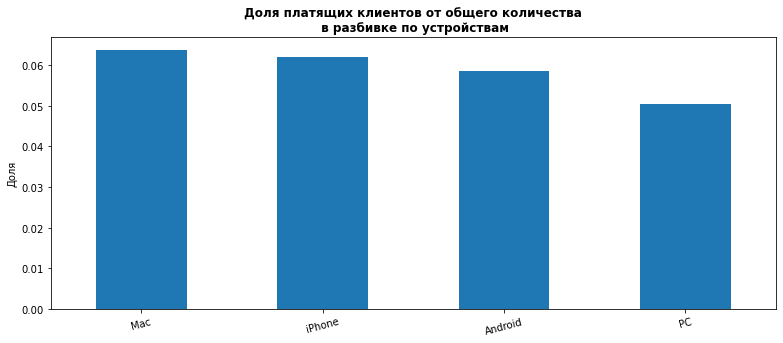

In [20]:
profiles_by_params('device', 'устройствам')

Клиенты приложения используют 4 устройства - Мас, iPhone, Android и PC, на первых двух доля платящих примерно одинакова 6.2-6.4%, несколько меньше доля платящих пользователей использует приложение на Android - 5.9% и меньше всего на РС - 5%.

<a id='part3.4'></a>

### Анализ данных в разбивке по каналам привлечения.

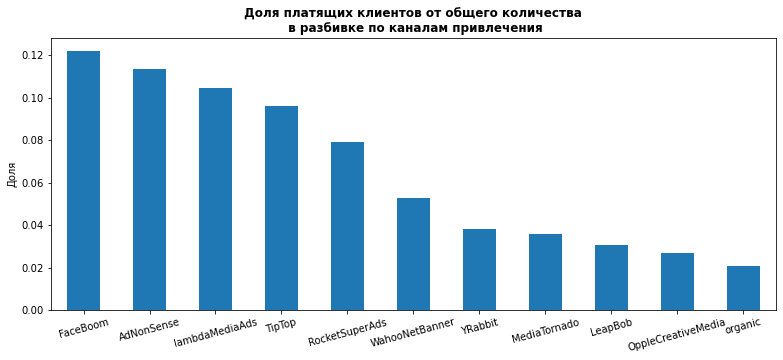

In [21]:
profiles_by_params('channel', 'каналам привлечения')

Всего по данным имеется 10 каналов привлечения. по построенной выше таблице и графику можно сказать следующее:
- каналы привлечения лидеры в плане привлечения платящих пользователей: TipTop - 9.6%, lambdaMediaAds - 10.5%, AdNonSense - 11.3% и FaceBoom - 12.2%
- каналы привлечения со средним результатом: WahooNetBanner	5.3% и RocketSuperAds около 7.9%
- каналы привлечения аутсайдеры: OppleCreativeMedia, LeapBob, MediaTornado, YRabbit - конверсия в платящих около 3-4%
- 2% органических клиентов(привлечённых бесплатно) становятся платящими

<a id='part3.5'></a>

### Вывод.

- По пользовательским профилям определены даты привлечения пользователей - с 1 мая по 27 октября 2019 года.
- Посетители приходят всего из 4 стран - Франция, Великобритания, Германия и США. США дают больше всего платящих пользователей, в остальных трёх доля платящих пользователей из всех привлечённых примерно равна.
- Клиенты используют 4 устройства - PC, Android, iPhone и Мас. При этом большая часть пользователей заходит с мобильных устройств. С устройств Apple платящие пользователи заходят чаще.
- Определено 10 рекламных каналов, по которым шло привлечение пользователей. Каналы, приносящие больше всего платящих пользователей: TipTop, lambdaMediaAds, AdNonSense и FaceBoom.

<a id='part4.1'></a>

## Часть 4. Маркетинг.
### Определение стоимости привлечения клиентов в зависимости от источника и времени.

In [22]:
print(f"Общая сумма затрат на рекламу по всем каналам за исследуемый период: {round(profiles['acquisition_cost'].sum())}")

Общая сумма затрат на рекламу по всем каналам за исследуемый период: 105497


In [23]:
adv = profiles.groupby('channel').agg({'acquisition_cost':'sum'}).sort_values(
    'acquisition_cost', ascending=False).head(10)
adv_top = adv.index[0:2]
adv_head = adv.index[2:6]
adv_tail = adv.index[6:10]
adv

acquisition_cost
channel                             
TipTop                      54751.30
FaceBoom                    32445.60
WahooNetBanner               5151.00
AdNonSense                   3911.25
OppleCreativeMedia           2151.25
RocketSuperAds               1833.00
LeapBob                      1797.60
lambdaMediaAds               1557.60
MediaTornado                  954.48
YRabbit                       944.22

По таблице видно, что львиная доля затрат приходится на два рекламных канала - TipTop и FaceBoom, остальные сильно меньше.

Визуализируем затраты на рекламу по каналам во времени, однако, для адекватности оценки графиков и нормализации масштаба построим отдельно графики по группам: каналы со средними затратами, каналы с маленькими затратами и топ-каналы, чтобы графики сильно не наслаивались друг на друга.

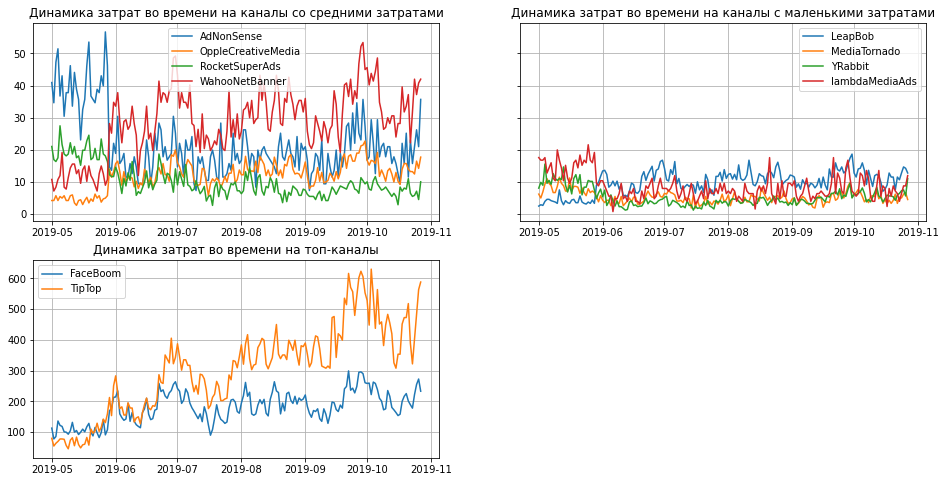

In [24]:
plt.figure(figsize=(16, 8))

ax1 = plt.subplot(2, 2, 1)
profiles.query('channel in @adv_head').pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='sum').plot(grid=True, ax=ax1)
plt.legend()
plt.xlabel('')
plt.title('Динамика затрат во времени на каналы со средними затратами')

ax2 = plt.subplot(2, 2, 2, sharey=ax1)
profiles.query('channel in @adv_tail').pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='sum').plot(grid=True, ax=ax2)
plt.legend()
plt.xlabel('')
plt.title('Динамика затрат во времени на каналы с маленькими затратами')

ax3 = plt.subplot(2, 2, 3)
profiles.query('channel in @adv_top').pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='sum').plot(grid=True, ax=ax3)
plt.legend()
plt.xlabel('')
plt.title('Динамика затрат во времени на топ-каналы')
plt.show()

Заключения по графикам:
- общее: на всех кривых имеются спады в середине месяца и локальные пики в конце каждого месяца переходящие в начало следующего месяца - это может говорить о временных интервалах при выделении бюджета на рекламу, возможно к концу месяца появляются отчёты о эффективности привлечения пользователей, после чего формируются планы на следующий месяц с возможным перераспределением бюджета по каналам и к началу месяца вновь начинаются вложения в маркетинг
- по топ-каналам:
    - по масштабу можно сказать, что на топ-каналы было потрачено до 10 раз больше средств
    - с июля 2019 в канал TipTop начали вкладывать больше средств, чем в FaceBoom, далее во времени разрыв только увеличивается, хотя в мае картина была обратная
    - оба этих канала с июня начинают получать больше денег
- по группе средних затрат:
    - в июне перераспредилились направления в которые вкладывала компания: WahooNetBanner и OppleCreativeMedia начали получать значительно больше средств и в следующих месяцах эта сумма увеличивается
    - AdNonSense и RocketSuperAds наоборот, получили в мае больше средств, в последующем значительно меньше	
- по группе маленьких затрат:
    - так же в июне перераспредилились направления в которые вкладывала компания: LeapBob начали получать значительно больше средств, чем ранее
    - lambdaMediaAds, MediaTornado и YRabbit наоборот, получили в мае больше средств, в последующем меньше

<a id='part4.2'></a>

### Определение стоимости привлечения одного пользователя.

Для начала определим среднюю стоимость привлечения каждого пользователя в целом, так же посмотрим как влияет на эту цифру наличие органических пользователей.

In [25]:
display(round(profiles['acquisition_cost'].mean(), 2))
round(profiles.query('channel != "organic"')['acquisition_cost'].mean(), 2)

0.7

1.13

По цифрам понятно, что органические пользователи сильно влияют на общий САС, снижают его почти в 1.5 раза. Для будущего анализа окупаемости инвестиций в рекламу нужно будет исключить органических пользователей из исследования, чтобы не исказить результаты.

Определим САС в разбивке по каналам привлечения.

In [26]:
profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(
    'acquisition_cost', ascending=False).head(10)

acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172

Средняя стоимость одного клиента сильно отличается в разных каналах, можно выделить три группы стоимостей:
1. TipTop - самые "дорогие" клиенты, стоимость одного почти 2.8 доллара
2. Группа каналов со стоимостью привлечённого клиента 0.4-1.1 доллара, в порядке убывания стоимости -  FaceBoom, AdNonSense, lambdaMediaAds, WahooNetBanner, RocketSuperAds
3. Группа каналов с низкой стоимостью привлечения 0.21-0.25 доллара, в порядке убывания стоимости - OppleCreativeMedia, YRabbit, MediaTornado и LeapBob	

Выясним, как меняется стоимость привлечения одного клиента для каждого источника во времени, построим график истории изменений. Сначала в общем по проекту без учета органиков и далее отдельно по каналам.

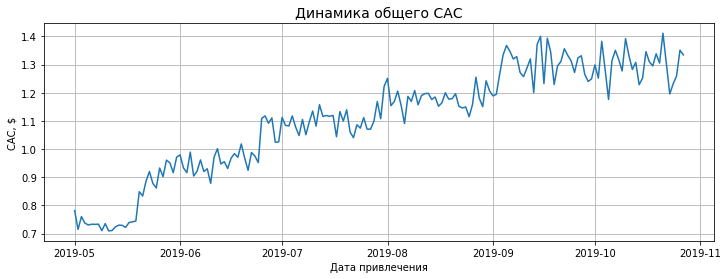

In [27]:
profiles.query('channel != "organic"').pivot_table(
    index='dt', values='acquisition_cost', aggfunc='mean').plot(
    grid=True, figsize=(12, 4), legend=None)
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика общего САС', fontsize=14)
plt.show()

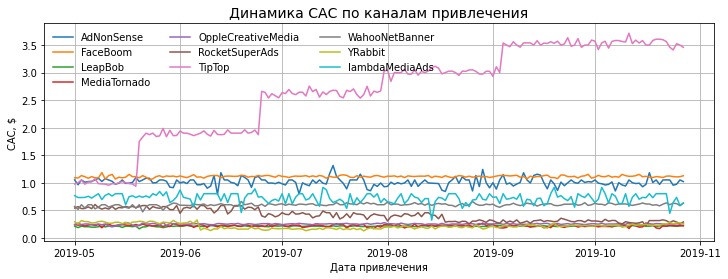

In [28]:
profiles.query('channel != "organic"').pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(12, 4))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения', fontsize=14)
plt.legend(loc=2, ncol=3, framealpha=0)
plt.show()

По графикам можно сделать два важных вывода:
- **САС на канале TipTop значительно увеличивается во времени**
- **САС на канале TipTop выраженно влияет на общий САС во времени**

Чтобы рассмотреть график детальнее увеличим масштаб, убрав кривую TipTop с графика.

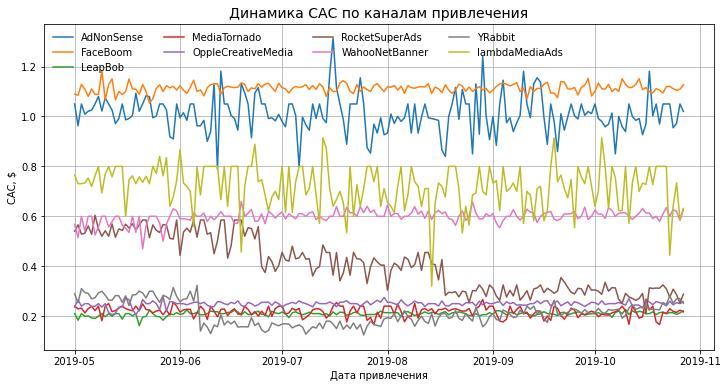

In [29]:
profiles.query('channel != "TipTop" and channel != "organic"').pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(12, 6))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения', fontsize=14)
plt.legend(loc=2, ncol=4, framealpha=0)
plt.show()

По графику видно:
- есть шесть каналов, САС которых стабильна за весь период исследования: FaceBoom, AdNonSense, lambdaMediaAds, OppleCreativeMedia, MediaTornado, LeapBob
- на канале WahooNetBanner средняя стоимость привлечения пользователя вырастает в июне по сравнению с маем и далее держится на одном уровне
- на канале YRabbit средняя стоимость привлечения пользователя в мае-начале июня на уровне примерно 30 центов, что выше трёх других каналов, однако, в июне стоимость резко падает до августа, затем растёт медленным темпом до конца исследуемого временного периода
- самое интересное наблюдение на канале RocketSuperAds, с мая по июнь САС примерно одинакова с WahooNetBanner и составляет около 55 центов, с июня по сентябрь САС выраженно снижается почти в два раза и держится на этом уровне до конца исследуемого временного периода

<a id='part4.3'></a>

### Вывод.

Заключения по затратам на маркетинг:
- общая сумма затрат на рекламу по всем каналам за исследуемый период: 105497 долларов
- львиная доля затрат приходится на два рекламных канала - TipTop и FaceBoom, остальные сильно меньше
- бюджет на рекламу распределяется неравномерно в течение каждого месяца с просадкой в середине месяца
- в июне по всем каналам произошло перераспределение средств, маркетологи сделали ставки на другие каналы: каналы, получавшие больше средств в мае, в следующих месяцах отошли на второй план
- средняя стоимость привлечения одного клиента сильно отличается в разных каналах, можно выделить особенности:
    - TipTop - самые "дорогие" клиенты, стоимость одного почти 2.8 доллара, во втором топ-канале(по общему количеству затрат) - FaceBoom, один клиент обходится дешевле в 2.5 раза, примерно так же стоит клиент привлечённый из AdNonSense
    - в остальных каналах стоимость привлечения пользователя в среднем сильно меньше доллара
- важные наблюдения с графиков изменения средней стоимости привлечения одного клиента во времени:
    - САС на канале TipTop значительно увеличивается во времени
    - САС на канале TipTop выраженно влияет на общий САС во времени
    - САС на канале RocketSuperAds снижается во времени 
    - по остальным каналам САС примерно стабилен во времени.

<a id='part5.1'></a>

## Часть 5. Оценка окупаемости рекламы для привлечения пользователей.

### Анализ общей окупаемости рекламы.

Приступим к анализу окупаемости рекламы, для этого установим момент и горизонт анализа данных. 

На календаре 1 ноября 2019 года - это будет моментом нашего анализа, в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения, в таком случае зададим горизонт анализа - 14 дней.

Так же предварительно исключим органических пользователей из таблицы профилей и заказов.

In [30]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
profiles_without_organic = profiles.query('channel != "organic"')
print(f'\nКоличество всех пользователей - {profiles.shape[0]}')
print(f'\nКоличество пользователей без органических - {profiles_without_organic.shape[0]}')


Количество всех пользователей - 150008

Количество пользователей без органических - 93569


In [31]:
result_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_without_organic, 
    orders, 
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False)

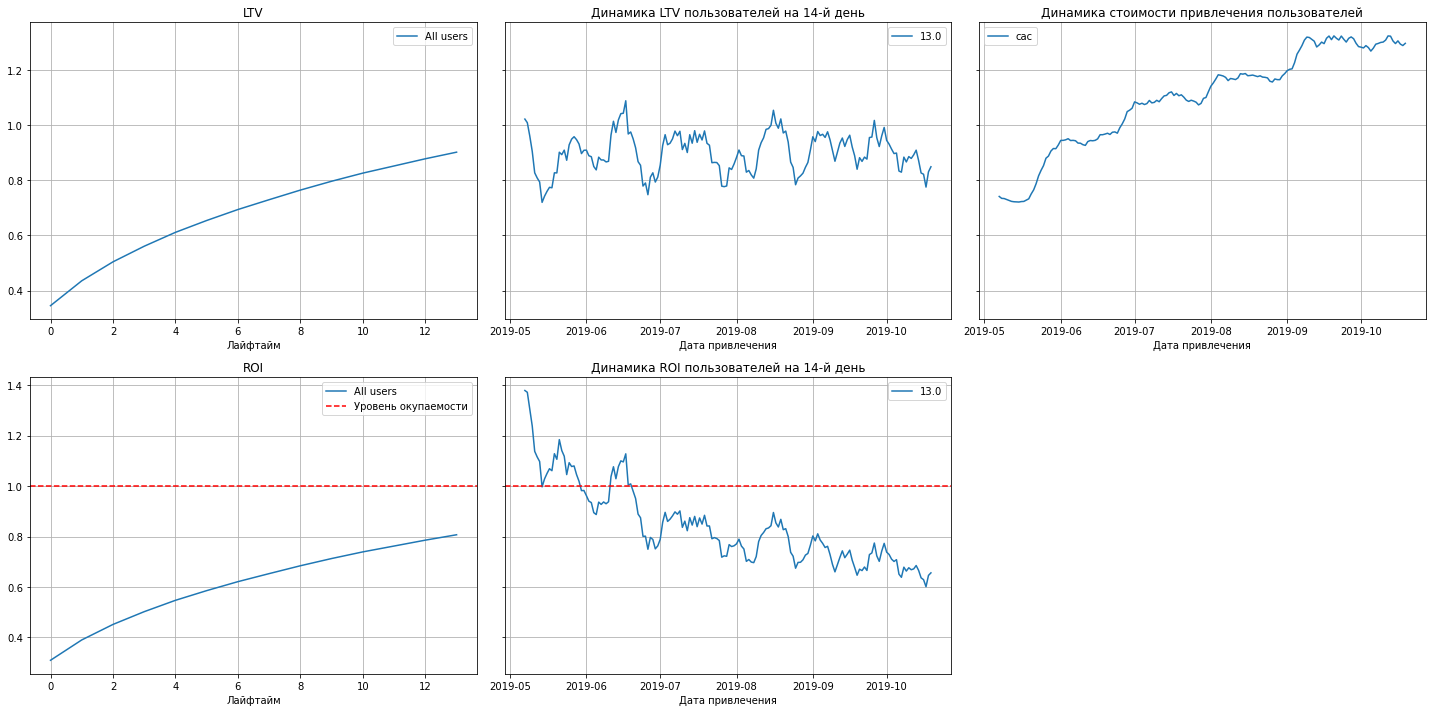

In [32]:
# в данном случае ширины окна - 7 достаточно для сглаживания графиков
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

По графикам можно сделать такие выводы:
- Реклама не окупается. ROI в конце двухнедельного периода — чуть выше 80%.
- ROI в динамике стабильно снижается, в мае пользователи окупались через две недели после привлечения, с июня ситуация обратная
- CAC увеличивается во времени скачкообразно, т.е. рекламный бюджет увеличивается во времени примерно раз в месяц, как мы и определяли ранее, скорее всего проблема в каналах привлечения.
- LTV достаточно стабилен во времени, дело не в ухудшении качества пользователей.

<a id='part5.2'></a>

### Анализ окупаемости рекламы в разбивке по устройствам, странам, рекламным каналам.

**Анализ окупаемости рекламы в разбивке по устройствам.**

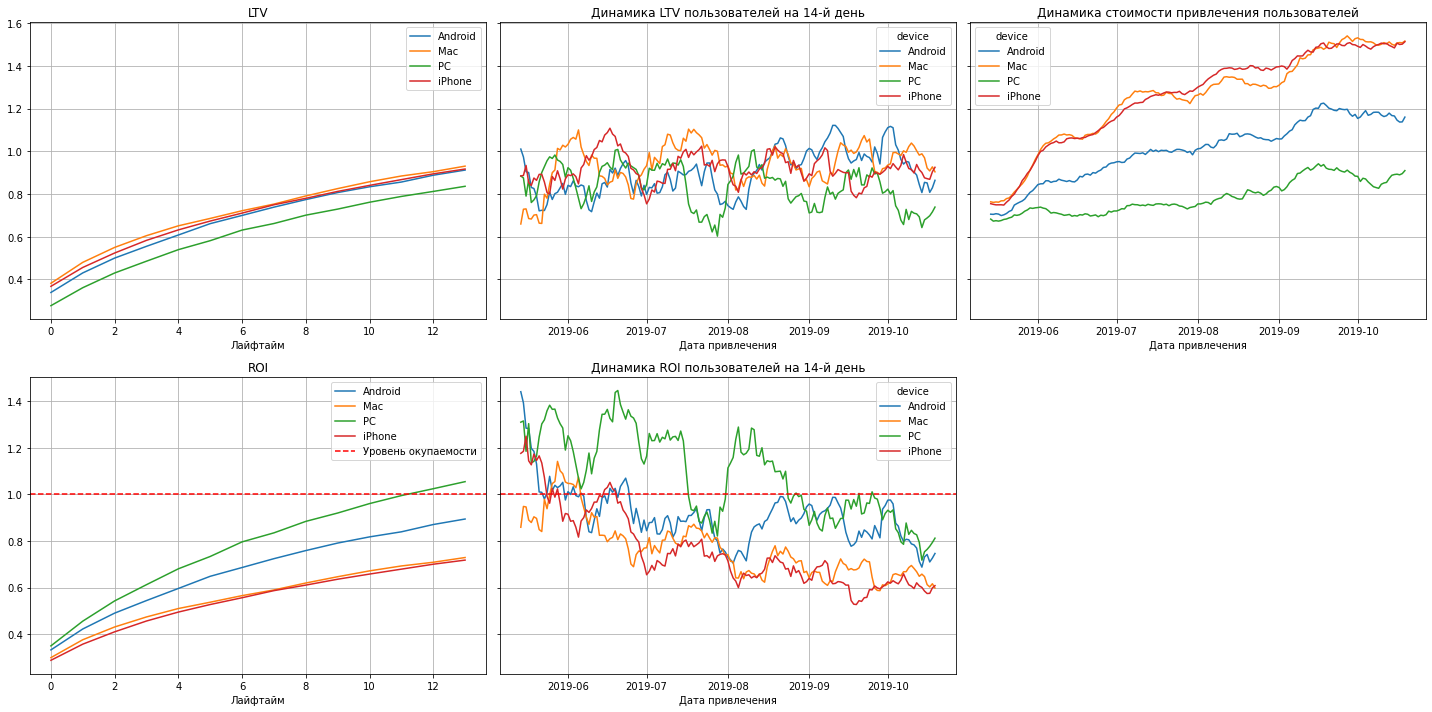

In [33]:
result_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_without_organic, 
    orders, 
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False)
# в данном случае ширина окна увеличена до 14 для сглаживания графиков
plot_ltv_roi(
    ltv, ltv_history, roi, roi_history, horizon_days, window=14
) 

Заключения в разбивке по устройствам:
- LTV относительно стабилен - качество пользователей не снижается
- на РС стоимость привлечения пользователей со временем растёт незначительно, быстрее увеличивается САС пользователей Android, и максимально растет на устройствах Apple
- окупаются к горизонту анализа только пользователи РС, пользователи остальных устройств стабильно не окупаются, пользователи устройств Apple окупаются хуже всего
- окупаемость падает в динамике по всем устройствам,  что говорит о том, что корневая проблема кроется не в устройствах

**Анализ окупаемости рекламы в разбивке по странам.**

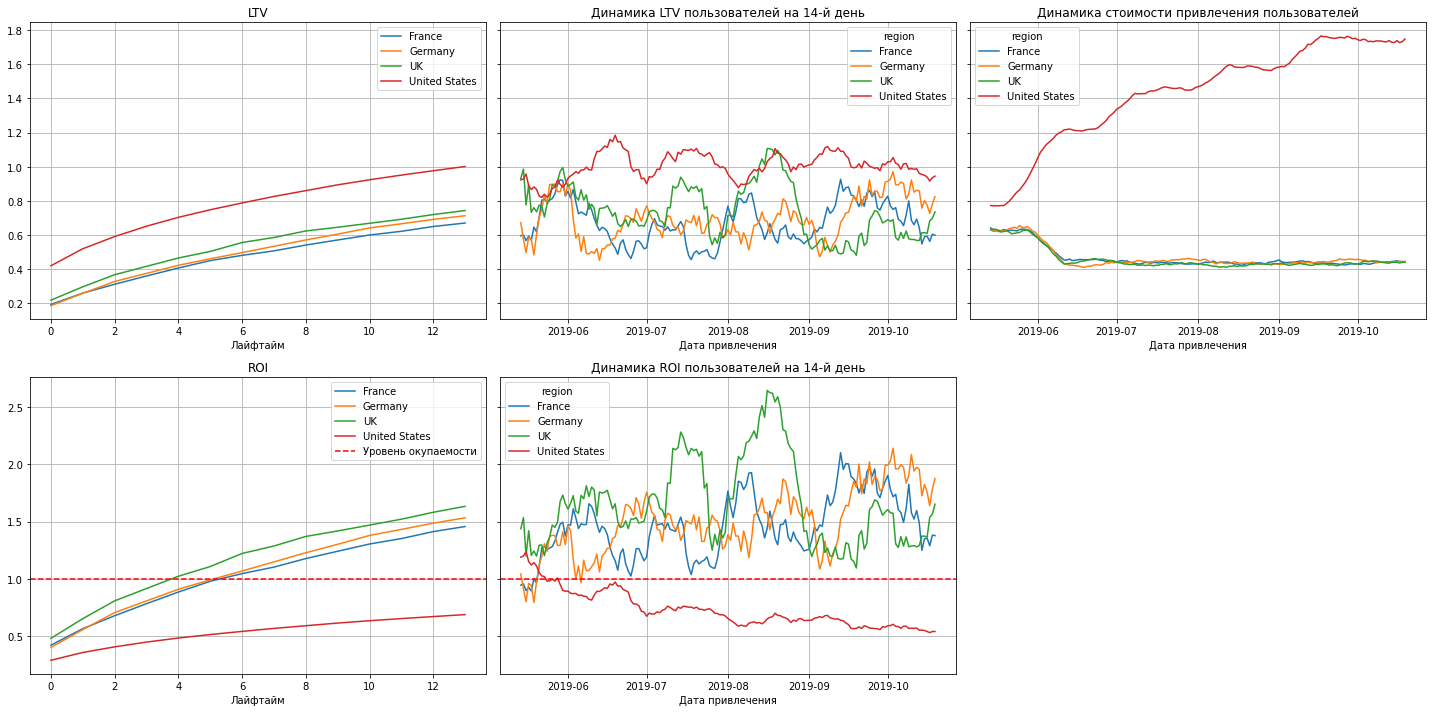

In [34]:
result_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_without_organic, 
    orders, 
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False)
# в данном случае ширина окна увеличена до 14 для сглаживания графиков
plot_ltv_roi(
    ltv, ltv_history, roi, roi_history, horizon_days, window=14
) 

Заключения в разбивке по странам:
- качество пользователей так же стабильно
- стоимость привлечения в июне всех стран кроме США падает и находится на стабильном уровне с июля
- стоимость привлечения пользователей из США с начала анализа и до конца сильно увеличивается
- реклама во всех регионах кроме США окупается уже с конца первой недели
- реклама в США не окупается за двухнедельный горизонт.
- динамика окупаемости рекламы в среднем медленно растет во всех странах во времени кроме США, там окупаемость всё время падает и с июня она ниже уровня окупаемости

**Анализ окупаемости рекламы в разбивке по каналам привлечения.**

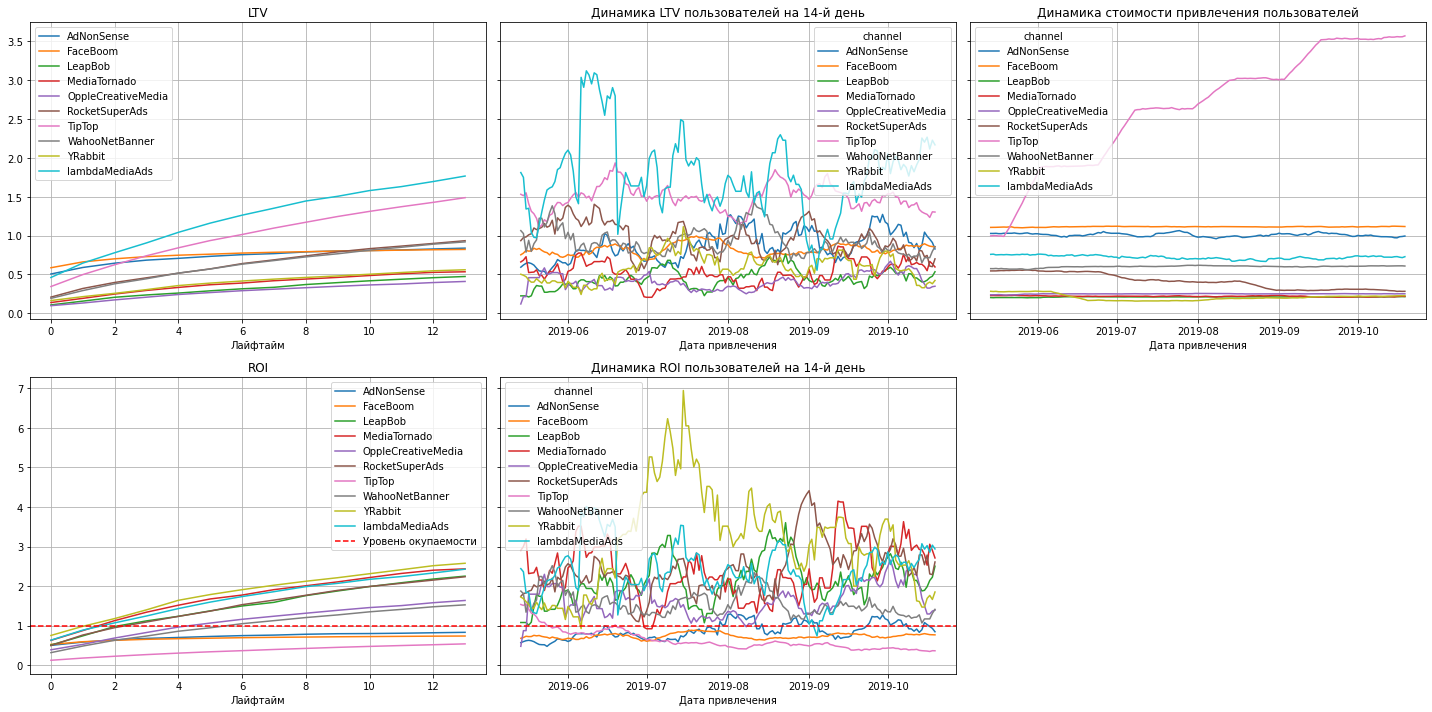

In [35]:
result_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_without_organic, 
    orders, 
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False)
# в данном случае ширина окна увеличена до 14 для сглаживания графиков
plot_ltv_roi(
    ltv, ltv_history, roi, roi_history, horizon_days, window=14
) 

Заключения в разбивке по каналам привлечения:
- пожизненная ценность пользователей по прежнему нормальная
- по динамике САС изменения на графике были описаны в разделе маркетинг: 
    - САС на канале TipTop значительно увеличивается во времени
    - САС на канале RocketSuperAds снижается во времени
    - по остальным каналам САС примерно стабильна во времени.
- ROI не достигает уровня окупаемости по трём каналам: TipTop, FaceBoom и AdNonSense, по остальным каналам инвестиции окупаются
- в динамике окупаемость рекламы волнообразна, при этом в среднем стабильна

**Промежуточный вывод по окупаемости рекламы.**

По анализу окупаемости рекламных кампаний можно сделать следующие выводы:
- в общем анализе:
    - Реклама в целом не окупается. ROI в конце двухнедельного периода — чуть выше 80%.
    - ROI в целом динамике стабильно снижается
    - CAC в целом увеличивается во времени
    - LTV в целом и в разбивке по параметрам достаточно стабилен во времени, дело не в ухудшении качества пользователей.
- на окупаемость рекламы могут влиять негативно:
    - пользователи из США полностью не соответствуют остальным регионам, только там не окупается реклама, стоимость привлечения увеличивается во времени, а динамика окупаемости рекламы падает, из-за этого региона искажается общая картина
    - три канала привлечения с самым высоким САС отрицательно влияют на результат окупаемости в целом - TipTop, FaceBoom и AdNonSense, ROI пользователей, привлечённых из этих каналов, не достигают уровня окупаемости. Стабильно растущий САС канала TipTop максимально влияет на общую картину, даже кривые графиков САС в разбивке по другим параметрам схожи с ним.
    
Проблемы окупаемости могут быть вызваны проблемами удержания или конверсии пользователей. Проанализируем эти метрики.

<a id='part5.3'></a>

### Анализ конверсии и удержания.

Для начала оценим общие показатели конверсии и удержания без разбивки по параметрам.

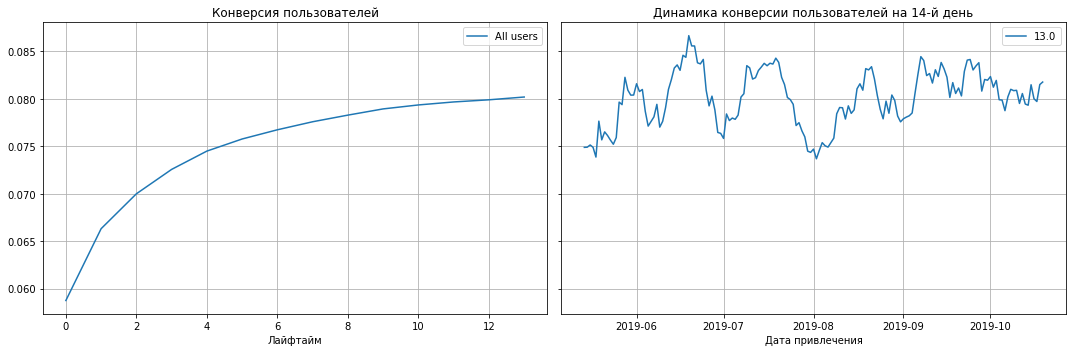

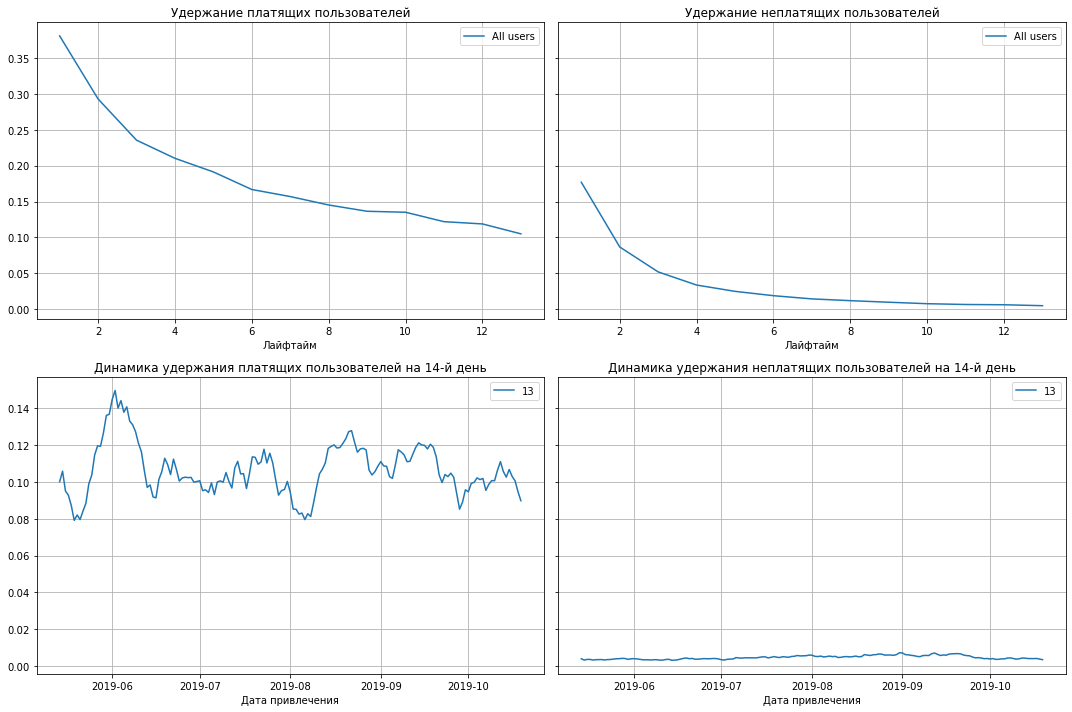

In [36]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_without_organic, 
    orders, 
    observation_date, 
    horizon_days, 
    dimensions=[]
)

retention_raw, retention, retention_history = get_retention(
    profiles_without_organic, 
    visits, 
    observation_date, 
    horizon_days, 
    dimensions=[]
)

plot_conversion(conversion, conversion_history, horizon_days, window=14)
plot_retention(retention, retention_history, horizon_days, window=14)

На общих графиках слабых мест не видно, проведём анализ конверсии и удержания в разбивке по устройствам, странам, рекламным каналам.

**Конверсия и удержание в разбивке по устройствам.**

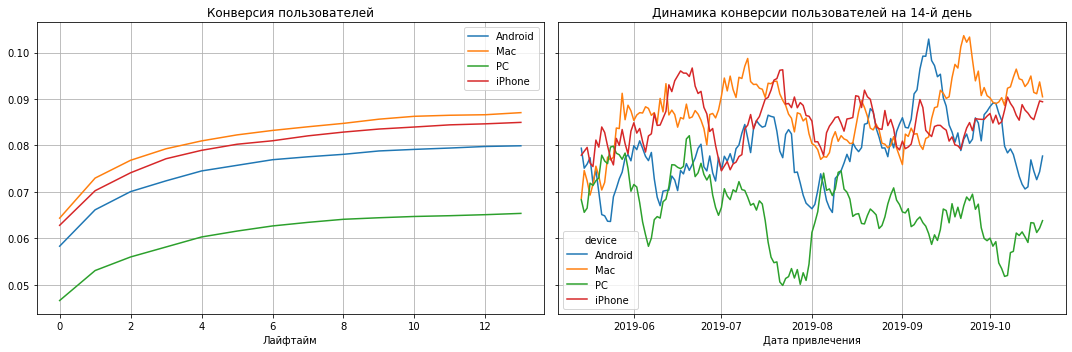

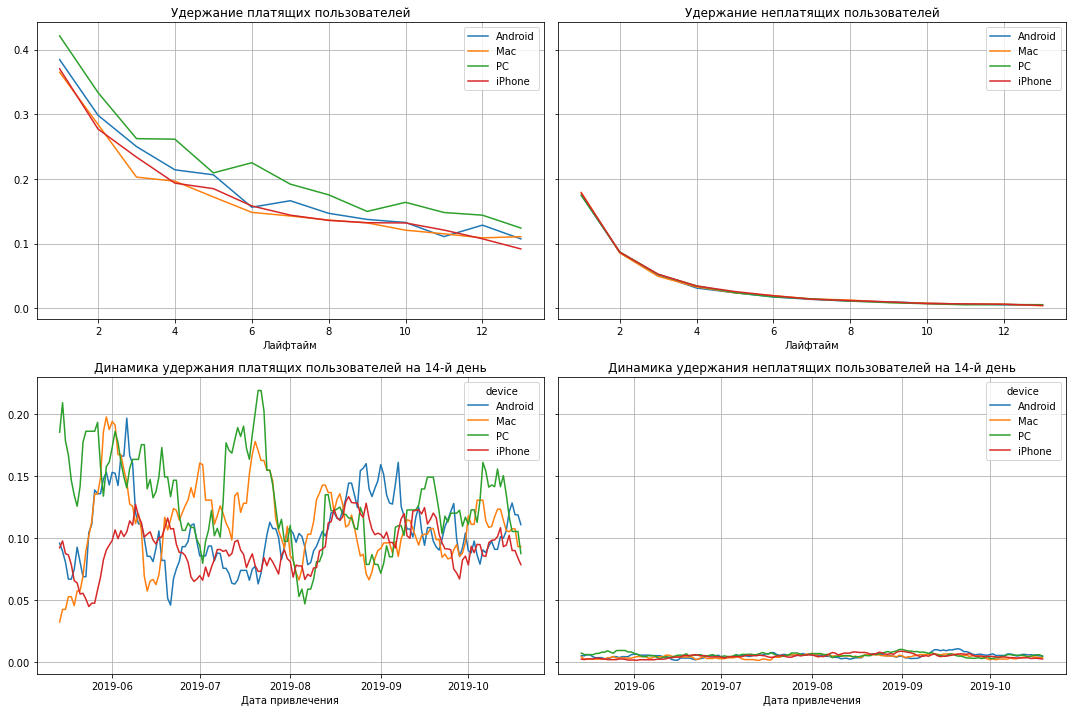

In [37]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_without_organic, 
    orders, 
    observation_date, 
    horizon_days, 
    dimensions=['device']
)

retention_raw, retention, retention_history = get_retention(
    profiles_without_organic, 
    visits, 
    observation_date, 
    horizon_days, 
    dimensions=['device']
)

plot_conversion(conversion, conversion_history, horizon_days, window=14)
plot_retention(retention, retention_history, horizon_days, window=14)

По графикам выше видно, что дело не в устройствах, пользователи конвертируются и удерживаются нормально не зависимо от вида устройства. 

**Конверсия и удержание в разбивке по странам.**

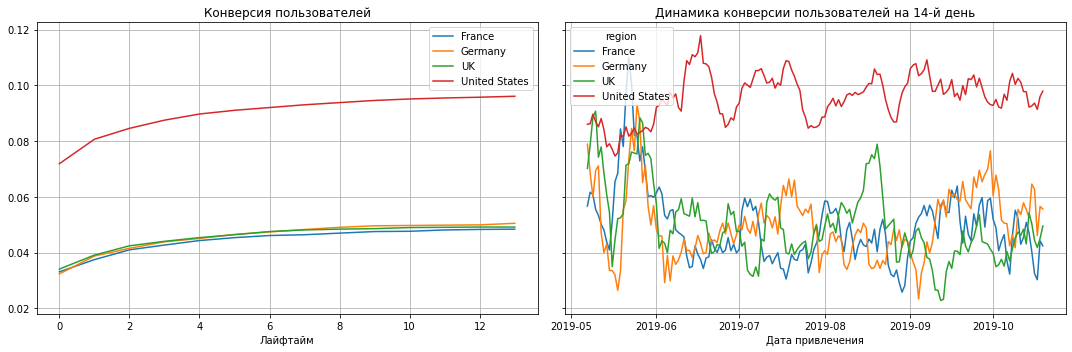

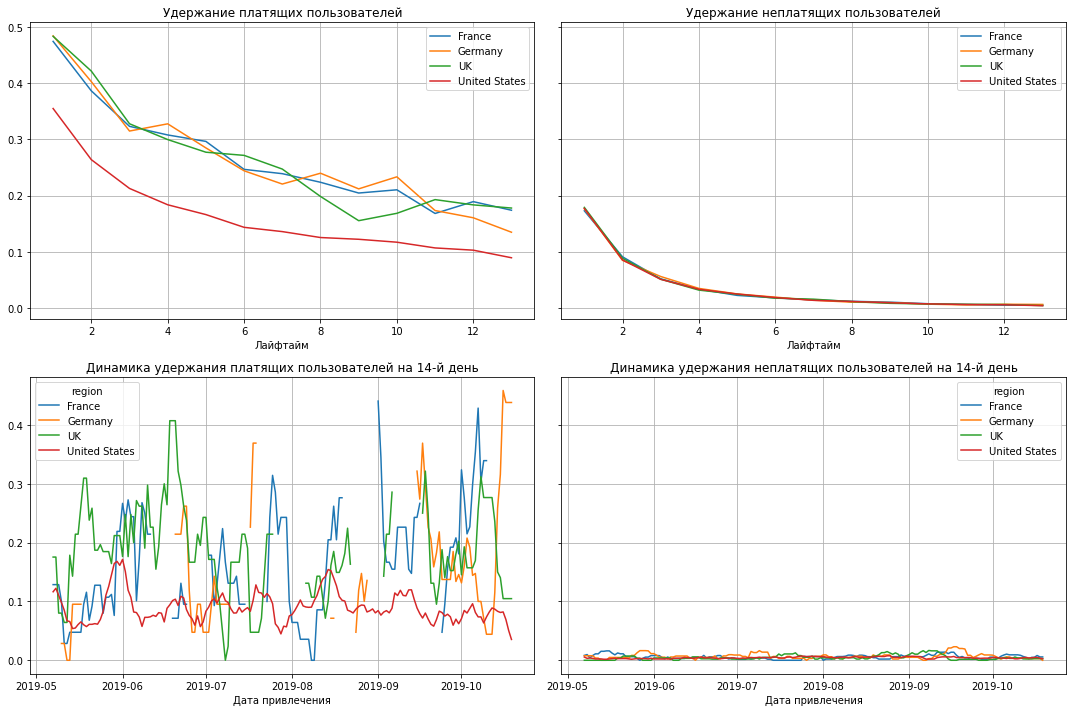

In [38]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_without_organic, 
    orders, 
    observation_date, 
    horizon_days, 
    dimensions=['region']
)

retention_raw, retention, retention_history = get_retention(
    profiles_without_organic, 
    visits, 
    observation_date, 
    horizon_days, 
    dimensions=['region']
)

plot_conversion(conversion, conversion_history, horizon_days, window=7)
plot_retention(retention, retention_history, horizon_days, window=7)

По результатам анализа по странам выявлено: пользователи из США конвертируются лучше остальных регионов, а удерживаются хуже остальных.

**Конверсия и удержание в разбивке по каналам привлечения.**

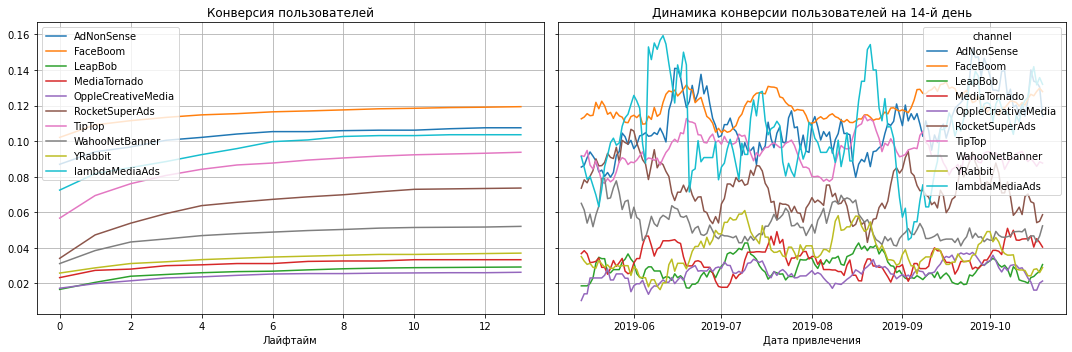

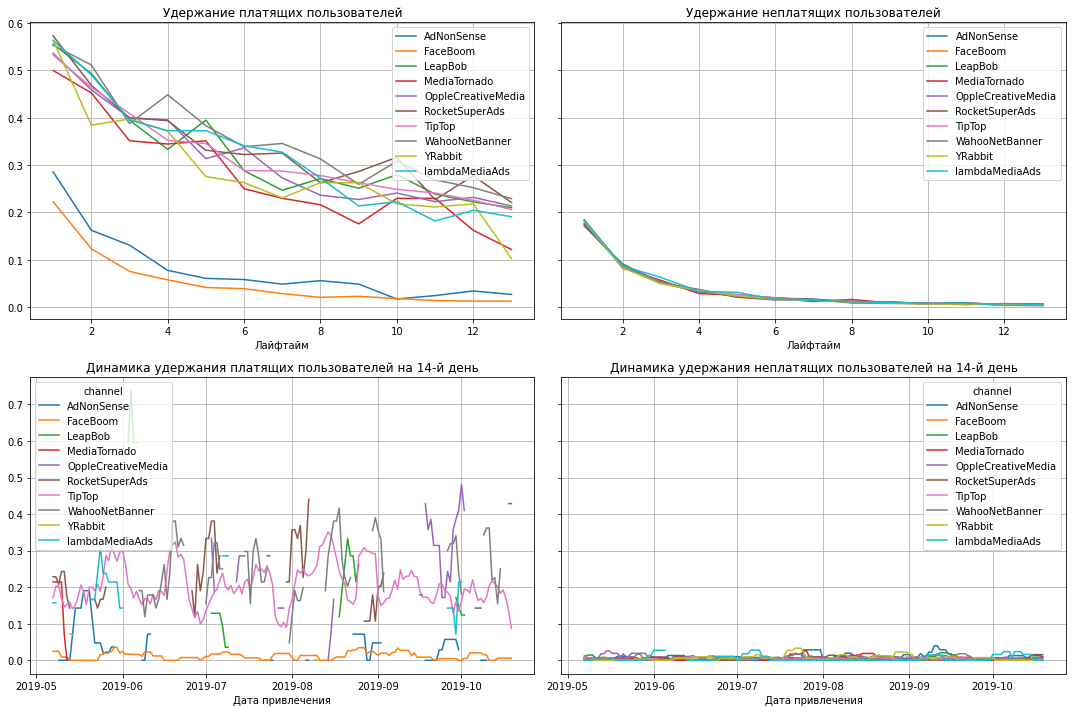

In [39]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_without_organic, 
    orders, 
    observation_date, 
    horizon_days, 
    dimensions=['channel']
)

retention_raw, retention, retention_history = get_retention(
    profiles_without_organic, 
    visits, 
    observation_date, 
    horizon_days, 
    dimensions=['channel']
)

plot_conversion(conversion, conversion_history, horizon_days, window=14)
plot_retention(retention, retention_history, horizon_days, window=7)

При анализе конверсии и удержания по каналам привлечения можно заключить:
- самая высокая конверсия с каналов AdNonSense и FaceBoom, у них же самое низкое удержание
- во времени конверсия примерно не меняется
- канал с самым дорогим САС - TipTop на 4 месте по конверсии, а по удержанию не отличается от основных каналов привлечения(кроме AdNonSense и FaceBoom)

Так же следует отметить факт, что удержание неплатящих пользователей из разных каналов, стран, платформ столь ровное, а удержание платящих очень отличается, это влияние численности когорт - неплатящих сильно больше, чем покупателей, соответственно эта величина ведёт себя менее волатильно.

<a id='part5.4'></a>

### Общий вывод, определяющий направления дальнейшего анализа.

По анализу затрат на маркетинг, окупаемости рекламы в общем и в разбивке по параметрам, можно сделать следующие заключения, касающиеся выбора направления дальнейшего анализа:
- по затратам на маркетинг:
    - очень дорогой канал привлечения TipTop, так же дорого привлекать пользователей из каналов FaceBoom и WahooNetBanner
    - в июне произошло перераспределение бюджета по каналам привлечения, рекламный отдел увеличил инвестиции в каналы TipTop, FaceBoom, WahooNetBanner, OppleCreativeMedia, LeapBob; уменьшил инвестиции в каналы AdNonSense, RocketSuperAds, lambdaMediaAds, MediaTornado, YRabbit
    - в динамике стоимость привлечения одного пользователя растёт на каналах: TipTop, WahooNetBanner, причём кривая графика увеличения САС из TipTop коррелирует с кривой графика динамики затрат на рекламу в целом
    - в динамике стоимость привлечения одного пользователя на канале RocketSuperAds падает
- по окупаемости рекламы:
    - реклама в целом не окупается
    - САС по США растёт в динамике, а по остальным странам с июня снизилось и стабилизировалась
    - реклама в США не окупается, в остальных странах окупается стабильно
    - реклама на каналах TipTop, FaceBoom и AdNonSense не окупается
    - интересное заключение по RocketSuperAds: реклама хорошо окупается при низком САС
- по конверсии и удержанию:
    - в США клиенты хорошо конвертируются и плохо удерживаются
    - пользователи с каналов TipTop, FaceBoom хорошо конвертируются и плохо удерживаются
    - при высоком и постоянно растущем САС на канале TipTop конверсия и удержание не отличаются от каналов, где САС значительно ниже
    - клиенты с канала RocketSuperAds нормально конвертируются и хорошо удерживаются
    
Заключение: с устройствами убытки компаний не должны быть связаны, скорее всего проблема регионального характера, нужно посмотреть окупаемость рекламы в целом и по канлам привлечения без пользователей из США, если там всё будет хорошо, то нужно будет разбираться что не так с США.

### Выявление возможных причин обнаруженных проблем.

**Анализ окупаемости рекламы без США.**

In [40]:
profiles_without_organic_and_usa = profiles_without_organic.query('region != "United States"')
print(f'\nКоличество пользователей всех стран без органических - {profiles_without_organic.shape[0]}')
print(f'\nКоличество пользователей всех стран без США и органических пользователей - {profiles_without_organic_and_usa.shape[0]}')


Количество пользователей всех стран без органических - 93569

Количество пользователей всех стран без США и органических пользователей - 31740


Пользователи из США составляют две трети от общего количества, понятно почему они влияют на общую картину.

Проанализируем окупаемость рекламы без США в общем и с разбивкой по каналам.

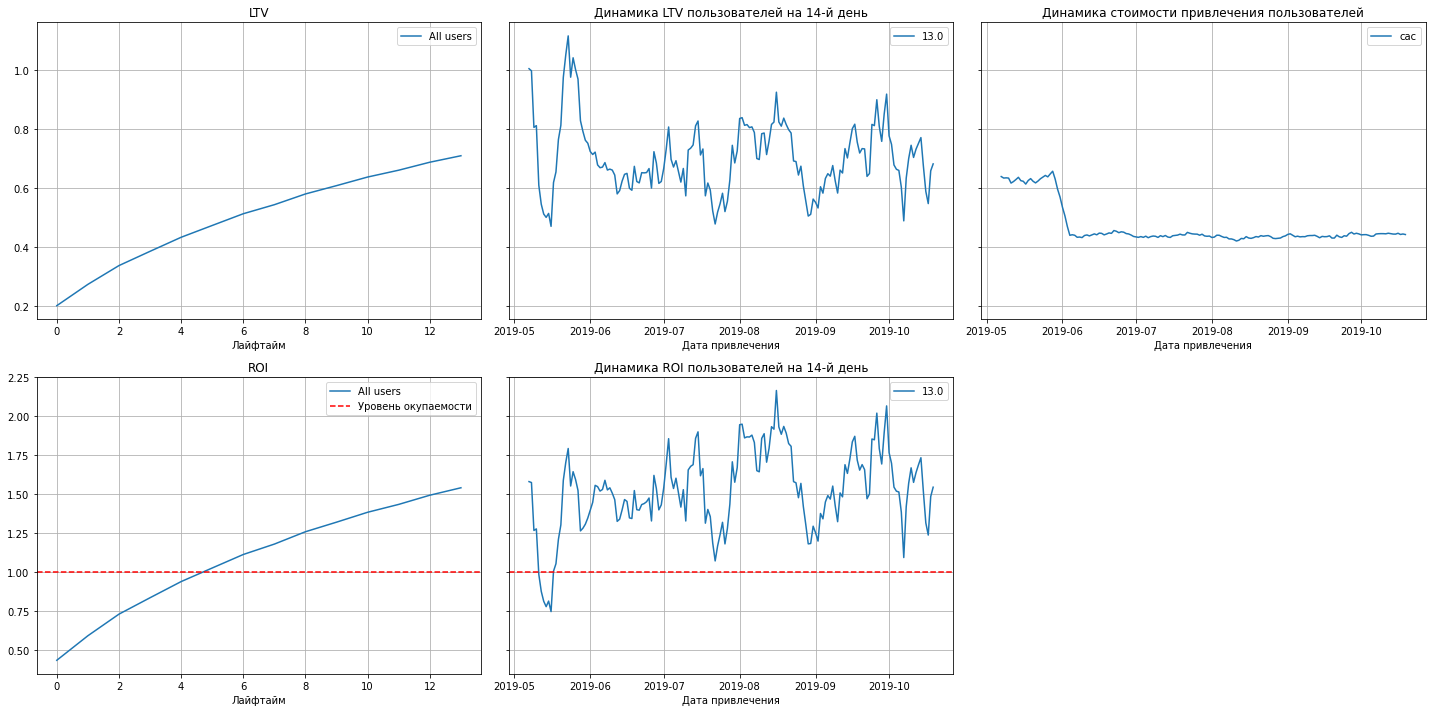

In [41]:
result_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_without_organic_and_usa, 
    orders, 
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

По графикам можно сделать такие выводы:

- Реклама прекрасно окупается уже к шестому дню. ROI в конце двухнедельного периода — чуть выше 1.5.
- ROI в динамике волнообразен, но стабильно окупается, в мае ситуация была хуже, но изменения в маркетинге принесли хороший результат
- эти перераспределения инвестиций в каналах привлечения снизили стоимость САС в европейском регионе и стабилизировали его с июня до конца периода наблюдения 

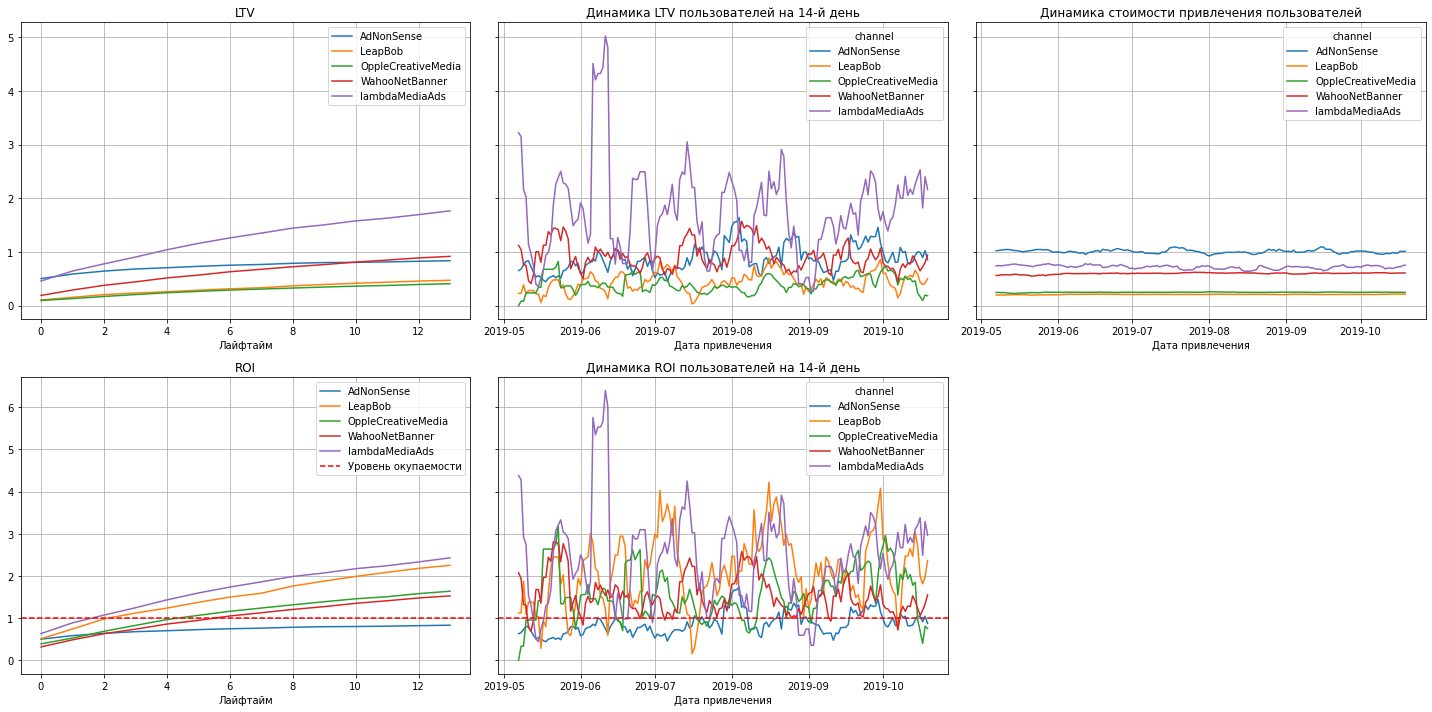

In [42]:
result_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_without_organic_and_usa, 
    orders, 
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7) 

В европейском регионе в разбивке по каналам мы видим проблему с одним каналом, это AdNonSense этот канал стабильно не окупается при самом высоком САС. Посмотрим на конверсию и удержание в европейском регионе в разбивке по каналам.

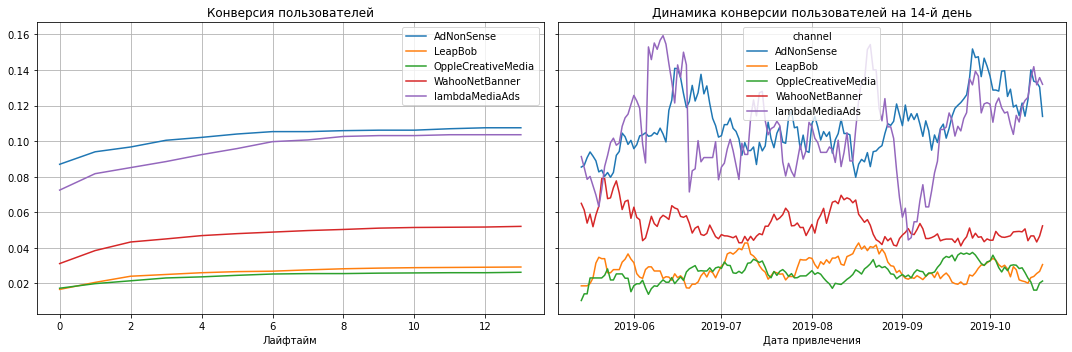

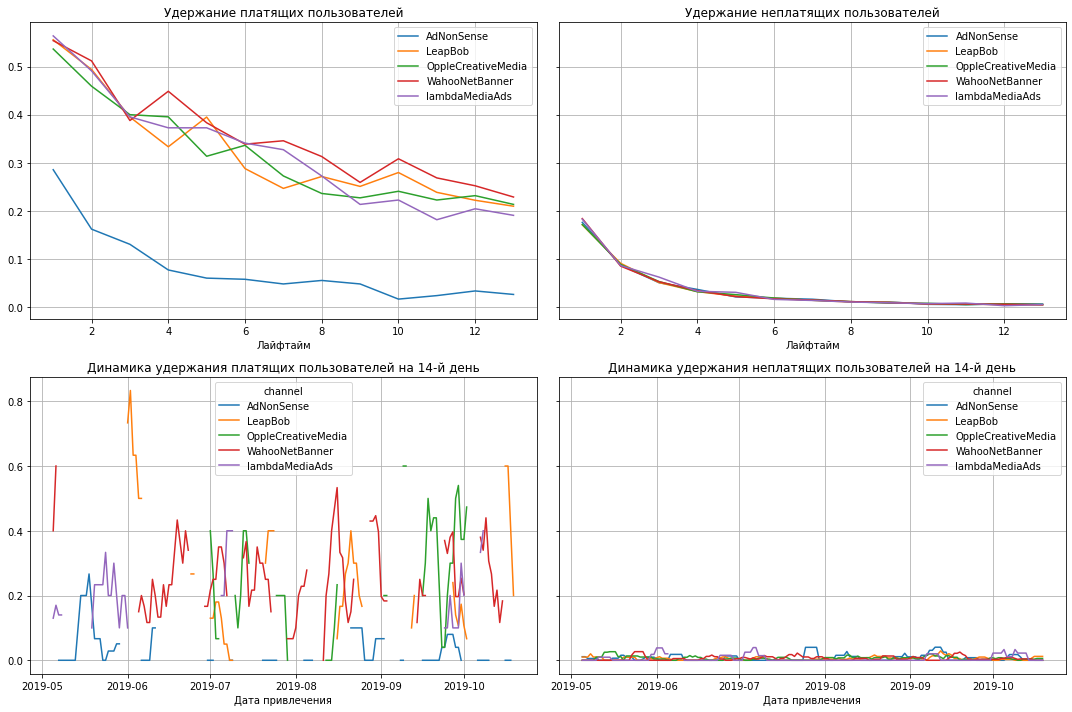

In [43]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_without_organic_and_usa, 
    orders, 
    observation_date, 
    horizon_days, 
    dimensions=['channel']
)

retention_raw, retention, retention_history = get_retention(
    profiles_without_organic_and_usa, 
    visits, 
    observation_date, 
    horizon_days, 
    dimensions=['channel']
)

plot_conversion(conversion, conversion_history, horizon_days, window=14)
plot_retention(retention, retention_history, horizon_days, window=5)

В европейских странах пользователи привлечённые с канала AdNonSense хорошо конвертируются, однако, плохо удерживаются, во многих местах линии графика этого канала находятся на нуле, по остальным каналам удержание и конверсия нормальные.

Для формирования рекомендаций для рекламного отдела нам нужно представлять чем одни каналы отличаются от других, сформируем таблицу для наглядности и выведем по ней рекомендации для европейского региона.

**Таблица каналов привлечения в Европе**

Как ранее выяснено в июне бюджет перераспределился - на привлечение из одних каналов начали выделять больше денег из других меньше, эти изменения отобразим в последнем столбце, назовем его Июнь.

| Канал             |САС     | ROI         |Конверсия|Удержание|Динамика удержания| Июнь
|:------------------|:-------|:------------|:--------|:--------|:-----------------|:--------
| AdNonSense        |высокая |не окупается | высокая | низкое  |низкая            |меньше   
| WahooNetBanner    |средняя |средняя      | средняя | среднее |средняя           |больше
| LeapBob           |низкая  |выше среднего| низкая  | среднее |средняя           |больше
| OppleCreativeMedia|низкая  |средняя      | низкая  | среднее |средняя           |больше
| lambdaMediaAds    |выше среднего| высокая| высокая | среднее |средняя           |меньше

**Заключения по анализу каналов привлечения в Европе:**
- канал AdNonSense убыточен от него нужно отказаться, единственный его плюс это хорошая конверсия, при этом эти клиенты нам дорого обходятся и не удерживаются, возможно им не интересен наш продукт, клиенты с этого канала - не наша целевая аудитория, правильно что на него стали выделять меньше денег в июне
- по каналам WahooNetBanner и OppleCreativeMedia ничего менять не нужно, они выдают средние показатели при небольших затратах
- канал LeapBob очень перспективен, при низкой САС мы имеем хорошую окупаемость и средние показатели удержания, на этом канале нужно поработать с конверсией, выяснить почему она низкая и постараться исправить это
- канал lambdaMediaAds неоправдано получает меньше инвестиций с июня месяца, пусть у него высокий САС, при этом высокие конверсия и окупаемость, нормальное удержание, нужно больше денег вкладывать в этот канал.

**Проведём отдельный анализ по региону  США.**

Посмотрим общую окупаемость.

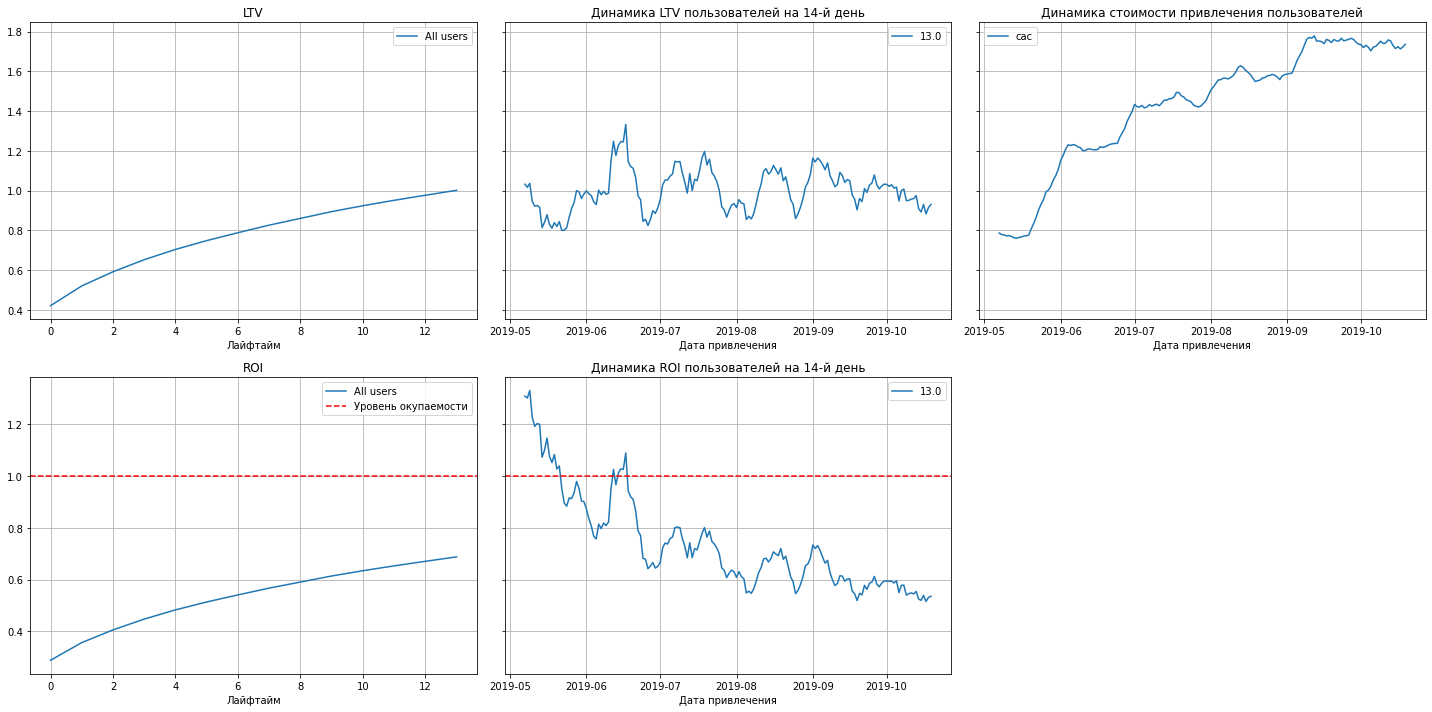

In [44]:
profiles_usa = profiles_without_organic.query('region == "United States"')

result_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_usa, 
    orders, 
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

Ситуация мало отличается от глобальных графиков, неудивительно, ведь пользователи из США составляют 2/3. Посмотрим разбивку по каналам привлечения.

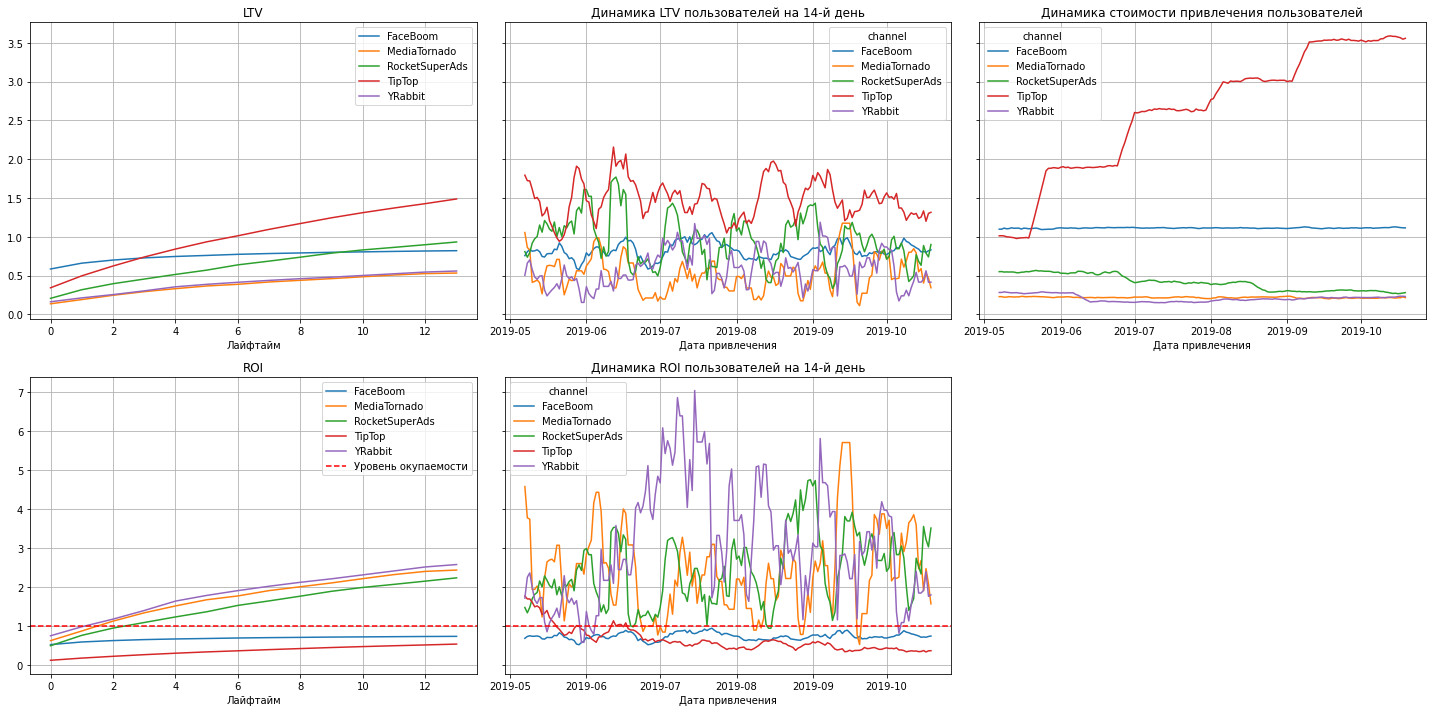

In [45]:
result_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_usa, 
    orders, 
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

Заключения по графикам:
- реклама в каналах TipTop, FaceBoom не окупается, в остальных каналах окупается к 3-4 дню
- лайфтайм стабилен - пользователи США - качественные
- канал YRabbit окупается лучше всех, видимо из-за периода июль-август, когда САС на этом канале ниже других месяцев, возможно были какие то акции для нашего приложения на размещение рекламы
- интересное наблюдение с графика динамики ROI: в мае, когда САС канала TipTop была сравнима с САС канала FaceBoom, реклама на канале TipTop окупалась

Посмотрим на удержание и конверсию.

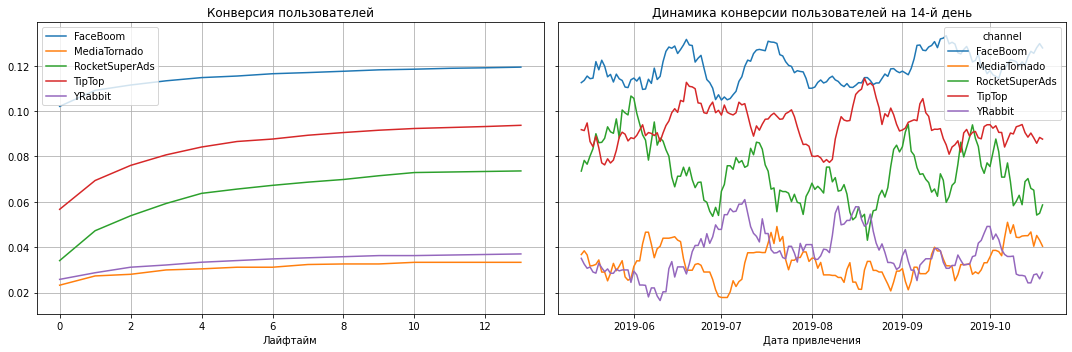

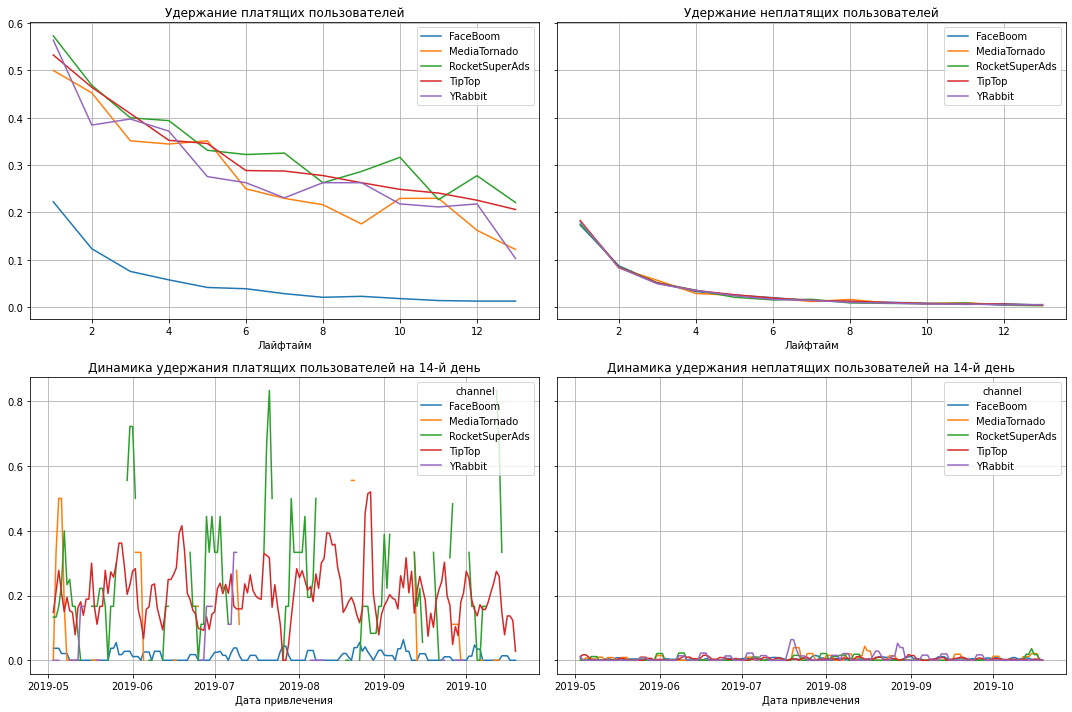

In [46]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_usa, 
    orders, 
    observation_date, 
    horizon_days, 
    dimensions=['channel']
)

retention_raw, retention, retention_history = get_retention(
    profiles_usa, 
    visits, 
    observation_date, 
    horizon_days, 
    dimensions=['channel']
)

plot_conversion(conversion, conversion_history, horizon_days, window=14)
plot_retention(retention, retention_history, horizon_days, window=3)

В США пользователи привлечённые с канала FaceBoom хорошо конвертируются, однако, плохо удерживаются, во многих местах линии графика этого канала находятся на нуле, по остальным каналам удержание и конверсия нормальные, однако, с каналов MediaTornado и YRabbit приходят очень мало платящих пользователей, линии графиков очень прерывистые.

Сформируем таблицу каналов привлечения по аналогии с Европой.

**Таблица каналов привлечения в США**

Как ранее выяснено в июне бюджет перераспределился - на привлечение из одних каналов начали выделять больше денег из других меньше, эти изменения отобразим в последнем столбце, назовем его Июнь.

| Канал        |САС    |ROI + динамика|Конверсия|Удержание|Динамика удержания| Июнь
|:-------------|:------|:-------------|:--------|:--------|:-----------------|:--------
|TipTop        |высокая|не окупается  | средняя | среднее |средняя           |больше   
|FaceBoom      |средняя|не окупается  | высокая | низкое  |низкая            |больше
|MediaTornado  |низкая |средняя       | низкая  | среднее |средняя           |меньше
|YRabbit       |низкая |средняя       | низкая  | среднее |средняя           |меньше
|RocketSuperAds|низкая |средняя       | средняя | среднее |высокая           |меньше

**Заключения по анализу каналов привлечения в США:**
- из канала TipTop приходят качественные пользователи, которые хорошо конвертируются и удерживаются, среди них много платящих, когда в мае цена привлечения была адекватная этот канал был перспективным, но постоянное повышение цены сделало его убыточным, от него нужно отказаться по простой причине - слишком высокий САС
- канал FaceBoom так же убыточен, нормальная стоимость привлечения и хорошая конверсия не помогают окупить рекламу, пользователи не задерживаются долго в приложении, возможно клиенты с этого канала не наша целевая аудитория
- каналы MediaTornado и YRabbit выглядят перспективно, при низкой САС мы имеем среднюю окупаемость и средние показатели удержания, если получится понять причины низкой конверсии и улучшить её, то в эти каналы можно инвестировать, но рекламный отдел рассудил иначе в июне
- канал RocketSuperAds по результатам анализа является самой верной инвестицией: при низком САС, который ещё и постоянно снижается во времени, канал окупается благодаря нормальной конверсии и отличному удержанию, нужно больше денег вкладывать в этот канал

Вкладывание бюджета в июне в канал FaceBoom и в TipTop стало ошибкой, которая за несколько месяцев привела компанию к убыткам, привлеченные пользователи с этих каналов смазывают всю остальную достаточно не плохую картину, при этом инвестиций лишились очень результативные каналы привлечения, такие как RocketSuperAds.

<a id='part5.6'></a>

### Вывод, формирование рекомендаций для рекламного отдела.

По результатам анализа главной причиной убытков стали рекламные кампании в США, неэффективные каналы выявлены, можно переходить к рекомендациям. По анализу данных в Европе ситуацию так же можно немного улучшить.

- Рекомендации для рекламного отдела по США:
    - не инвестировать в каналы, которые не окупаются - TipTop(слишком высокий САС) и FaceBoom(слишком низкое удержание)
    - инвестировать в канал RocketSuperAds(привлекает качественных пользователей по низкой цене)
    - изучить причины низкой конверсии на каналах MediaTornado и YRabbit, если получится улучшить конверсию, так же инвестировать в эти каналы
    
- Рекомендации для рекламного отдела по Европе:
    - не инвестировать в канал AdNonSense(низкое удержание при высоком САС)
    - инвестировать в канал lambdaMediaAds(хорошо окупается, пользователи качественные)
    - изучить причины низкой конверсии на канале LeapBob, если получится улучшить конверсию, так же инвестировать в эти каналы 

<a id='part6'></a>

## Часть 6. Выводы.

Итак, поставив себя на место  маркетингового аналитика развлекательного приложения Procrastinate Pro+, мы закончили исследование.
___
На входе были получены чистые данные без пропусков и дубликатов, которые были подготовлены:
- названия столбцов приведены к нужному регистру
- данные приведены к нужному типу
___
На этапе подготовки к анализу заданы функция для получения таблицы профилей пользователей по входным данным, функции для подсчета LTV, ROI, конверсии и удержания, а так же функции для их визуализации.
___
Проведён анализ данных: 
- составлены профили пользователей, найдены доли платящих клиентов в разбивке по параметрам:
    - посетители приходят всего из 4 стран - Франция, Великобритания, Германия и США. США дают больше всего платящих пользователей, в остальных трёх доля платящих пользователей из всех привлечённых примерно равна.
    - клиенты используют 4 устройства - PC, Android, iPhone и Мас. При этом большая часть пользователей заходит с мобильных устройств. С устройств Apple платящие пользователи заходят чаще.
    - определено 10 рекламных каналов, по которым шло привлечение пользователей. Каналы, приносящие больше всего платящих пользователей: TipTop, lambdaMediaAds, AdNonSense и FaceBoom.
___
Проведена оценка затрат на маркетинг: 
- определены каналы получающие больше всего инвестиций: TipTop и FaceBoom
- визуализирована динамика САС: растёт во времени, на графиках САС в разбивке по каналам выявлено, что САС увеличивается только в TipTop, при этом увеличивается так мощно, что это влияет на общую картину
___
Проанализирована окупаемость рекламы, выяснено:
- в целом реклама не окупается
- качество пользователей нормальное, LTV стабилен
- устройства пользователей не влияют на окупаемость
- реклама во всех странах окупается кроме США
- по каналам: TipTop, FaceBoom и AdNonSense не окупаются
- так же на этом этапе выполнена проверка правильности подсчётов LTV, CAC и ROI, ошибок не обнаружено
___
Проанализированы конверсия и удержание, обнаружены проблемы:
- клиенты из США не удерживаются
- клиенты из каналов FaceBoom и AdNonSense не удерживаются
- клиенты из TipTop нормально конвертируются и удерживаются, но очень дорого обходятся, поэтому не окупаются
___
Выбрано направление для дальнейшего анализа: анализ данных в разбивке на США и остальные регионы и по каналам привлечения. По результатам этого анализа сформированы рекомендации для рекламного отдела.
___
**Можно сделать финальный вывод: причиной неэффективности привлечения пользователей стала ставка отдела маркетинга на убыточные каналы привлечения, пользователи которых либо сильно дорого стоят, либо имеют низкое удержание - не наша целевая аудитория.**
- **Рекомендации для отдела маркетинга для повышения эффективности по США:**
    - не инвестировать в каналы, которые не окупаются - TipTop(слишком высокий САС) и FaceBoom(слишком низкое удержание)
    - инвестировать в канал RocketSuperAds(привлекает качественных пользователей по низкой цене)
    - изучить причины низкой конверсии на каналах MediaTornado и YRabbit, если получится улучшить конверсию, так же инвестировать в эти каналы
    
- **Рекомендации для отдела маркетинга для повышения эффективности по Европе:**
    - не инвестировать в канал AdNonSense(низкое удержание при высоком САС)
    - инвестировать в канал lambdaMediaAds(хорошо окупается, пользователи качественные)
    - изучить причины низкой конверсии на канале LeapBob, если получится улучшить конверсию, так же инвестировать в эти каналы